In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os




In [11]:
import os
cwd = os.getcwd()
cwd

'/Users/sankalp/Documents/URL Code'

In [2]:
pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 527.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

ModuleNotFoundError: No module named 'seaborn'

In [12]:
data = pd.read_csv(cwd +'/malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

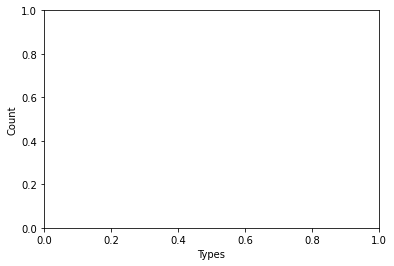

In [ ]:
#sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [ ]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":1, "malware":1}}
data['Category'] = data['type']
data = data.replace(rem)
data

,url,type,Category
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [ ]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))
data

,url,type,Category,url_len
0,br-icloud.com.br,phishing,1,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45


In [ ]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))
data

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org


In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))
data

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,0,0,0,0,0,0,0,0


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))
data


,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,sus_url
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,0,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [ ]:

from urllib.parse import parse_qsl, urljoin, urlparse


data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
data

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,sus_url,abnormal_url
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


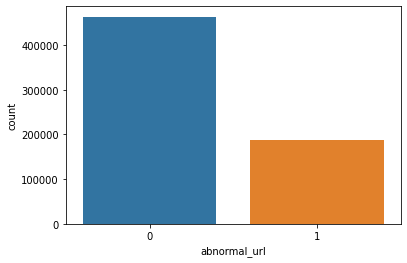

In [ ]:
sns.countplot(x='abnormal_url', data=data);

In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,sus_url,abnormal_url,https
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


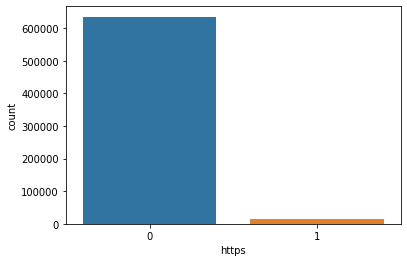

In [ ]:
sns.countplot(x='https', data=data);

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
data['digits']= data['url'].apply(lambda i: digit_count(i))
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,+,$,!,*,",",//,sus_url,abnormal_url,https,digits
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,1,0,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,1,0,1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,7
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:
data['letters']= data['url'].apply(lambda i: letter_count(i))
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,sus_url,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,1,0,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,1,0,1,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,0,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,0,0,7,29
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,30
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,36


In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,sus_url,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,0,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,0,1,0,22,199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,0,7,29,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,0,3,30,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,36,0


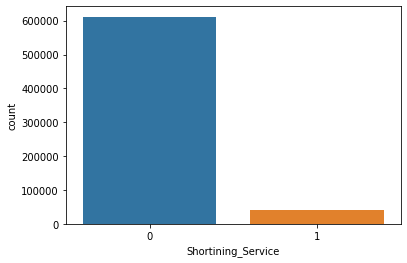

In [ ]:
sns.countplot(x='Shortining_Service', data=data);

In [ ]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [ ]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data

,url,type,Category,url_len,domain,@,?,-,=,.,...,*,",",//,sus_url,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,1,0,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,1,0,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,xbox360.ign.com,0,0,0,0,3,...,0,0,0,0,0,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,games.teamxbox.com,0,0,2,0,2,...,0,0,0,0,0,0,7,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,gamespot.com,0,0,0,0,1,...,0,0,0,0,0,0,3,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,en.wikipedia.org,0,0,0,0,2,...,0,0,0,0,0,0,0,36,0,0


In [ ]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

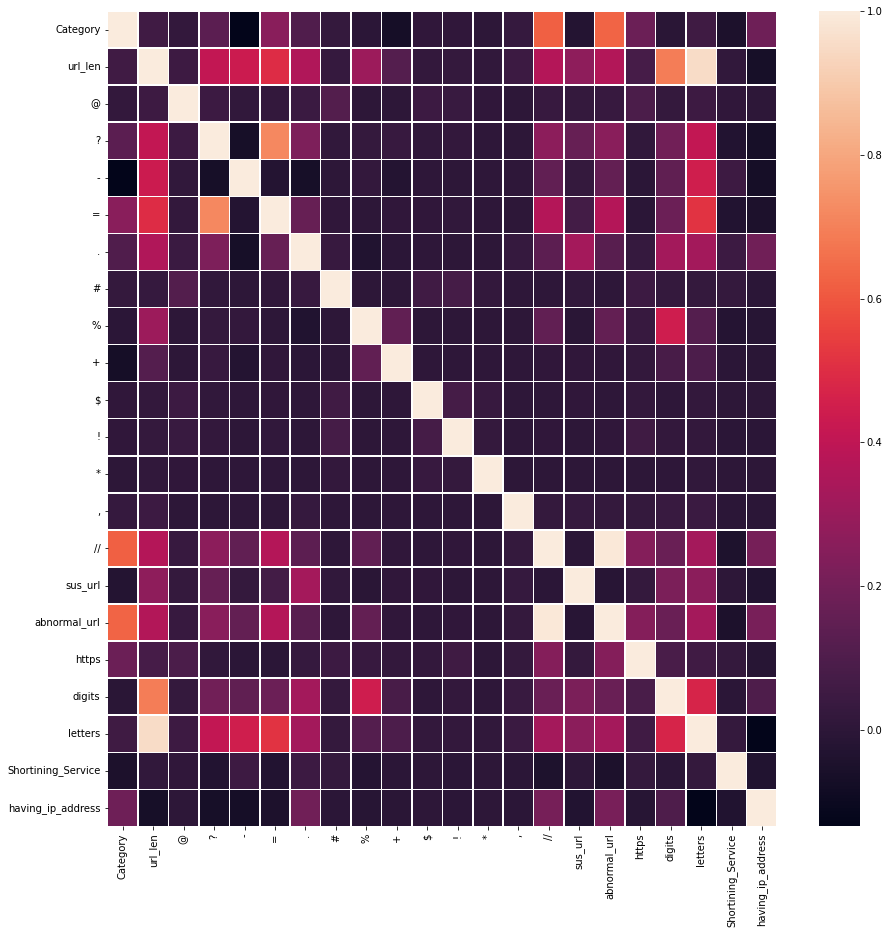

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [ ]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [ ]:
X_train

array([[-0.39101109, -0.04386156, -0.50305756, ..., -0.24432222,
        -0.25601169, -0.1401825 ],
       [ 1.61415137, -0.04386156,  1.77627763, ...,  1.89053432,
        -0.25601169, -0.1401825 ],
       [ 3.55172408, -0.04386156,  4.05561282, ...,  2.08171551,
         3.90607169, -0.1401825 ],
       ...,
       [-0.34595126, -0.04386156, -0.50305756, ..., -0.56295752,
        -0.25601169, -0.1401825 ],
       [-0.07559228, -0.04386156, -0.50305756, ...,  0.10617662,
        -0.25601169, -0.1401825 ],
       [ 0.3299462 , -0.04386156,  1.77627763, ...,  0.23363074,
        -0.25601169, -0.1401825 ]])

In [ ]:
X_test

array([[ 0.82560433, -0.04386156,  1.77627763, ...,  0.99835547,
        -0.25601169, -0.1401825 ],
       [ 0.55524535, -0.04386156,  1.77627763, ...,  0.45667545,
        -0.25601169, -0.1401825 ],
       [ 0.53271543, -0.04386156, -0.50305756, ..., -0.46736693,
        -0.25601169, -0.1401825 ],
       ...,
       [-0.66137008, -0.04386156, -0.50305756, ..., -0.59482105,
        -0.25601169, -0.1401825 ],
       [-1.11196838, -0.04386156, -0.50305756, ..., -1.1683646 ,
        -0.25601169, -0.1401825 ],
       [-0.41354101, -0.04386156, -0.50305756, ..., -0.40363987,
        -0.25601169, -0.1401825 ]])

In [ ]:
valpred  = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Logistic Regression: ")
acc
#>>> accuracy_score(y_true, y_pred, normalize=False)

Accuracy for Logistic Regression: 


0.8583557441842162

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Logistic Regression")
avg

AUPRC for Logistic Regression


0.7116337408865281

In [ ]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
549880    1
457491    1
148149    0
574773    0
369760    0
Name: Category, Length: 520953, dtype: int64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
valpred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Decision Tree: ")
acc

Accuracy for Decision Tree: 


0.9126216760437122

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Decision Tree:")
avg

AUPRC for Decision Tree:


0.8124398087157245

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for Naive Bayes:")
acc


Accuracy for Naive Bayes:


0.8501112384418557

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Naive Bayes")
avg

AUPRC for Naive Bayes


0.8124398087157245

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for K nearest Neighbours :")
acc


Accuracy for K nearest Neighbours :


0.908124149395435

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, y_pred.round())
print("AUPRC for K nearest Neighbours")
avg

AUPRC for K nearest Neighbours


0.8010246051939209

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
valpred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
acc

0.8777394505838338

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for SVC")
avg

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
valpred = rf_random.predict(X_test)
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Random Forest")
avg

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85565
           1       0.96      0.68      0.80     44674

    accuracy                           0.88    130239
   macro avg       0.91      0.83      0.86    130239
weighted avg       0.89      0.88      0.88    130239

accuracy:   0.882
